In [1]:
# # TensorFlow and tf.keras
import tensorflow as tf

# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import models
import pandas as pd

import keras
import keras.backend
from keras import layers
from keras import models
import keras.utils

print(keras.__version__)
print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import time
import h5py
import sklearn
from sklearn.utils import shuffle

import os

/Users/ren/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ren/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ren/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ren/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

2.2.4
1.13.2


Using TensorFlow backend.


Import data from RNN_data.npz

In [2]:
# here we input the dummy data I haven't made yet

In [3]:
# training data
traindata_sig = np.load('data/dummyvectors_signal.npz')
traindata_bkg = np.load('data/dummyvectors_bkg.npz')
trainlabels = np.concatenate((traindata_sig['labels'],traindata_bkg['labels']),axis=0)
trainvectors = np.concatenate((traindata_sig['fourvectors'], traindata_bkg['fourvectors']), axis = 1)
trainradii = np.concatenate((traindata_sig['radiilab'], traindata_bkg['radiilab']), axis = 0)
traintheta = np.concatenate((traindata_sig['thetalab'], traindata_bkg['thetalab']), axis = 0)
trainz = np.concatenate((traindata_sig['zlab'], traindata_bkg['zlab']), axis = 0)
n_train = len(trainlabels)
print(trainvectors)
trainlabels = trainlabels.reshape(int(n_train/20), 20, 2)
trainvectors = trainvectors.reshape(int(n_train/20), 20, 4)

# testing data
testdata_sig = np.load('data/dummyvectors_sgn_test.npz')
testdata_bkg = np.load('data/dummyvectors_bkg_test.npz')
testlabels = np.concatenate((testdata_sig['labels'], testdata_bkg['labels']),axis=0)
testvectors = np.concatenate((testdata_sig['fourvectors'], testdata_bkg['fourvectors']), axis = 1)
testradii = np.concatenate((testdata_sig['radiilab'], testdata_bkg['radiilab']), axis = 0)
test_theta = np.concatenate((testdata_sig['thetalab'], testdata_bkg['thetalab']), axis = 0)
testz = np.concatenate((testdata_sig['zlab'], testdata_bkg['zlab']), axis = 0)
n_test = len(testlabels)
testlabels = testlabels.reshape(int(n_train/20), 20, 2)
testvectors = testvectors.reshape(int(n_train/20), 20, 4)




print(trainlabels.shape)

[[ 1.90064978e+02  4.27845460e+01  1.70035238e+02 ...  1.35169199e+02
   2.37843986e+02  3.20419339e+02]
 [ 1.00196660e-02  2.04591297e+00 -1.81902279e-01 ...  3.37734431e+00
  -1.15978378e+00 -1.83785187e-01]
 [ 5.61151711e+01  6.43907793e+01  5.04195039e+01 ...  8.26103715e+01
   4.46047221e+01  1.44204958e+02]
 [-1.46631729e+00 -1.50779250e+00 -1.21492400e+00 ...  2.88885031e+00
   1.37453964e+00  1.91506131e+00]]
(1000, 20, 2)


In [4]:
def build_model(rnn_units, batch, n_train):
    input1 = layers.Input(name = 'vector_input', batch_shape=(None, batch, 4))
    x = layers.GRU(4*rnn_units, return_sequences = True, name = 'gru')(input1)
    x = layers.GRU(2*rnn_units, return_sequences = True, name = 'gru2')(x)
    x = layers.GRU(rnn_units, return_sequences = True, name = 'gru3')(x)
    x = layers.GRU(rnn_units, return_sequences = True, name = 'gru4')(x)
#     xf = layers.Flatten(name = "flatten1")(x1)
#     input2 = layers.Input(shape=(1,), name = 'z_input')
#     input3 = layers.Input(shape=(2,), name = 'radii_input')
#     input4 = layers.Input(shape=(1,), name = 'theta_input')
#     x = layers.concatenate(inputs = [xf, input2, input3, input4],axis=-1, name = 'concat')
#     x = layers.Dense(64, activation=tf.nn.relu, name = 'relu1')(x)
#     x = layers.Dense(64, activation=tf.nn.relu, name = 'relu2')(x)
    output = layers.Dense(2, activation=tf.nn.softmax, name = 'softmax')(x)
    model = models.Model(inputs=input1, outputs=output)
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_crossentropy', 'accuracy'])
    return model

In [5]:
rnn_units = 256
batch = 20
RNN = build_model(rnn_units, batch, 10)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
example_batch = trainvectors[:10,:,:]
example_labels = trainlabels[:10,:,:]
example_radii = trainradii[:10]
example_theta = traintheta[:10]
example_z = trainz[:10]
print(example_radii.shape)
example_result = RNN.predict(x = [example_batch])
results = RNN.evaluate(x = [example_batch], y = example_labels)
print(example_result)
print(results)

(10, 2)
10/10 [==============================] - 0s 31ms/step
[[[0.5009188  0.49908122]
  [0.51793313 0.48206678]
  [0.5398628  0.46013716]
  [0.5637182  0.43628177]
  [0.5924114  0.40758854]
  [0.6138305  0.38616952]
  [0.63450706 0.3654929 ]
  [0.62914044 0.3708596 ]
  [0.6284187  0.3715813 ]
  [0.62388945 0.37611058]
  [0.6214899  0.37851015]
  [0.6197676  0.38023233]
  [0.61876005 0.38123992]
  [0.6211667  0.37883332]
  [0.615794   0.38420594]
  [0.6074958  0.39250422]
  [0.59295183 0.4070481 ]
  [0.5832894  0.41671062]
  [0.5590759  0.44092417]
  [0.5196318  0.48036823]]

 [[0.51080894 0.48919106]
  [0.5345419  0.46545812]
  [0.5464561  0.4535439 ]
  [0.5692161  0.4307839 ]
  [0.5815558  0.41844425]
  [0.5945586  0.40544146]
  [0.6130226  0.38697731]
  [0.6279164  0.37208357]
  [0.6310502  0.36894977]
  [0.639103   0.36089697]
  [0.63151294 0.36848706]
  [0.6131733  0.38682675]
  [0.6179515  0.3820485 ]
  [0.61670005 0.38329998]
  [0.6243906  0.37560943]
  [0.6343131  0.36568695]


In [7]:
inputlen = int(n_train/20)
RNN = build_model(rnn_units, batch, n_train)

In [8]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
    
checkpoint_path = "model/RNN.h5"
if not os.path.exists("model"):
    os.mkdir("model")

# Create checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
#                                                  save_best_only=True,
#                                                  verbose=1)
model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', 
                                   verbose=1, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)    
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = RNN.fit(
  trainvectors, trainlabels,
  epochs=EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks=[early_stop, model_checkpoint])

Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_loss improved from inf to 1.83703, saving model to model/RNN.h5

Epoch 00002: val_loss improved from 1.83703 to 1.75908, saving model to model/RNN.h5

Epoch 00003: val_loss did not improve from 1.75908

Epoch 00004: val_loss improved from 1.75908 to 1.68036, saving model to model/RNN.h5

Epoch 00005: val_loss did not improve from 1.68036

Epoch 00006: val_loss improved from 1.68036 to 1.33330, saving model to model/RNN.h5

Epoch 00007: val_loss did not improve from 1.33330

Epoch 00008: val_loss did not improve from 1.33330

Epoch 00009: val_loss did not improve from 1.33330

Epoch 00010: val_loss did not improve from 1.33330

Epoch 00011: val_loss did not improve from 1.33330

Epoch 00012: val_loss did not improve from 1.33330

Epoch 00013: val_loss did not improve from 1.33330

Epoch 00014: val_loss did not improve from 1.33330

Epoch 00015: val_loss did not improve from 1.33330

Epoch 00016: val_loss did not improve f

In [9]:
!ls model
best_model = keras.models.load_model('model/RNN.h5')
best_model.summary()
results = best_model.evaluate(testvectors, testlabels)
print(results)

CNN_cat_multi_input.h5 MLP.h5
CNN_sparce_cat.h5      RNN.h5
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vector_input (InputLayer)    (None, 20, 4)             0         
_________________________________________________________________
gru (GRU)                    (None, 20, 1024)          3161088   
_________________________________________________________________
gru2 (GRU)                   (None, 20, 512)           2360832   
_________________________________________________________________
gru3 (GRU)                   (None, 20, 256)           590592    
_________________________________________________________________
gru4 (GRU)                   (None, 20, 256)           393984    
_________________________________________________________________
softmax (Dense)              (None, 20, 2)             514       
Tota

[[[0.7443276  0.25567234]
  [0.49613282 0.50386715]
  [0.7897453  0.21025474]
  ...
  [0.6377477  0.3622523 ]
  [0.6434738  0.35652617]
  [0.63697284 0.36302716]]

 [[0.5372363  0.4627637 ]
  [0.13714921 0.8628508 ]
  [0.1552165  0.8447835 ]
  ...
  [0.37601295 0.6239871 ]
  [0.45470786 0.54529214]
  [0.42908543 0.57091457]]

 [[0.56107336 0.43892667]
  [0.67899674 0.32100326]
  [0.70591253 0.29408744]
  ...
  [0.8909961  0.10900389]
  [0.9332882  0.06671184]
  [0.8643689  0.13563102]]

 ...

 [[0.6639764  0.3360236 ]
  [0.715981   0.28401905]
  [0.7298648  0.27013522]
  ...
  [0.7911297  0.20887028]
  [0.7954102  0.20458971]
  [0.77913517 0.22086482]]

 [[0.6383049  0.36169514]
  [0.71361023 0.28638974]
  [0.75271744 0.24728255]
  ...
  [0.7354127  0.26458728]
  [0.7276643  0.27233568]
  [0.72714734 0.27285266]]

 [[0.6697741  0.33022588]
  [0.738808   0.26119202]
  [0.72963405 0.27036592]
  ...
  [0.77510667 0.22489335]
  [0.79191315 0.20808686]
  [0.70814824 0.2918517 ]]]
letsa figu

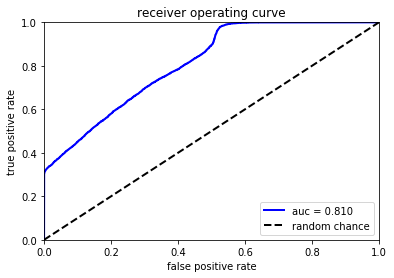

In [10]:
# Plot ROC
predict = best_model.predict(trainvectors)
print(predict)
print('letsa figure this outa')
print(predict[:,:,0].flatten())
# print(trainlabels[:,:,0])
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(trainlabels[:,:,0].flatten(), predict[:,:,0].flatten())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color='blue', label='auc = %.3f' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating curve')
plt.legend(loc="lower right")
plt.show()